# Assignment 2 
*by Sharanya Saha, 2111056*
### <center> Answer 1 <center>

In [1]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import time

### Implementation of gradient descent
The optima obtained by gradient descent algorithm might be a local or a global optima. It depends upon the initialization point and the learning rate.<br>
Hence, it is important to select a good initialization point and learning rate.

In [2]:
def gradient_descent(gradient,init_,learn_rate, n_iter=100, tol=1e-06):
    '''Returns the value of x at which the function attains a minima'''   
    x = init_
    for _ in range(n_iter):
        delta = -learn_rate * gradient(x)
        if np.all(np.abs(delta) <= tol):
            print("Breaks at iteration number:",_)
            break
        x += delta
    return round(x*1000)/1000

#### Function 1:
$f(x) = x^2 + 3x +4 $
<br>
$ => f'(x)= 2x+3 $
<br>
Therefore, the gradient is given by 2x+3

In [3]:
#Returns the value of y for a given value of x
def f1y(x) :
    return x**2 + 3*x +4

In [4]:
#min_x has the value of x at which minima is attained and min_y has the minimum value
min_x=gradient_descent(gradient=lambda v: 2 * v + 3, init_=4.0, learn_rate=0.1)
min_y=f1y(min_x)

Breaks at iteration number: 63


In [5]:
print('The given function attains a minima at: ' +str(min_x) + ' and the minimum value is: ' +str(min_y))

The given function attains a minima at: -1.5 and the minimum value is: 1.75


#### Function 2:
$f(x) = x^4 - 3x^2 + 2x $
<br>
$ => f'(x)= 4x^3 - 6x + 2 $
<br>
Therefore, the gradient is given by $4x^3 - 6x + 2$

In [6]:
#Returns the value of y for a given value of x
def f2y(x) :
    return x ** 4 - 3*(x**2) + 2*x

In [7]:
#min_x has the value of x at which minima is attained and min_y has the minimum value
min_x=gradient_descent(gradient=lambda v: 4*v*v*v - 6*v + 2, init_=-4.0, learn_rate=0.01,n_iter=100)
min_y=f2y(min_x)

Breaks at iteration number: 60


In [8]:
print('The given function attains a minima at: ' +str(min_x) + ' and the minimum value is: ' +str(min_y))

The given function attains a minima at: -1.366 and the minimum value is: -4.848076206064


The given function has more than 1 local optima, for such kind of a function a good selection of initialization point and learning rate is necessary, otherwise gradient descent may converge at some local minima.

Below are a few examples of change in results with change in initialization point and learning rate.

###### 1. initialization point = 4.0 and learning rate = 0.01

In [9]:
min_x=gradient_descent(gradient=lambda v: 4*v*v*v - 6*v + 2, init_= 4.0, learn_rate=0.01,n_iter=200)
min_y=f2y(min_x)
print('The given function attains a minima at: ' +str(min_x) + ' and the minimum value is: ' +str(min_y))

Breaks at iteration number: 157
The given function attains a minima at: 1.0 and the minimum value is: 0.0


The function has a local minima at 1.0. For the given initialization point and learning rate the function converges at a local minima.
###### 2.initialization point = 4.0 and learning rate = 0.02

In [10]:
min_x=gradient_descent(gradient=lambda v: 4*v*v*v - 6*v + 2, init_=4.0, learn_rate=0.02,n_iter=200)
min_y=f2y(min_x)
print('The given function attains a minima at: ' +str(min_x) + ' and the minimum value is: ' +str(min_y))

Breaks at iteration number: 36
The given function attains a minima at: -1.366 and the minimum value is: -4.848076206064


### A gradient function to calculate gradients for a linear regression y = ax + b

<br>
<center> Loss function(L) = $ \frac{1}{n} \sum_{i=1}^{n}(y_{i}-ax_{i}-b)^{2} $ </center> <br> <br>
<center> $ \frac {\delta L}{\delta a} = \frac {-2}{n} \sum_{i=1}^{n} x_{i}(y_{i} - ax_{i} - b) $ <br><br>
<center>  $ \frac {\delta L}{\delta b} = \frac {-2}{n} \sum_{i=1}^{n} (y_{i} - ax_{i} - b) $ </center>

In [11]:
#Returns the gradient for the loss function
def gradient(X,y,a,b) :
    n=len(X) #n is the size of the dataset
    Y_pred=a*X+b
    grad_a = (-2/n)*sum(X*(y-Y_pred))
    grad_b = (-2/n)*sum(y-Y_pred)
    return grad_a, grad_b

##### Implementation of gradient descent using the above gradient function:

In [12]:
#The function calculates the mean squared loss for the dataset for a given value of a and b
def cal_loss(X,y,a,b) :
    Y_pred=a*X+b
    return np.mean(np.square(y-Y_pred))

In [13]:
def gradient_descent(X,y,learning_rate=0.01,iterations=500,tol=1e-06) :
    loss=[]
    n = len(y)
    a=1
    b=1
    for i in range(iterations): 
        D_a, D_b = gradient(X,y,a,b)  #Returns the gradients
        delta1=-learning_rate*D_a
        delta2=-learning_rate*D_b
        if np.all(np.abs(delta1) <= tol) and np.all(np.abs(delta2)<=tol) : #breaks if converged
            print('Breaks at '+str(i)+'th iteration')
            break
        a = a + delta1  # Update a
        b = b + delta2  # Update b
        loss.append(cal_loss(X,y,a,b))
    return a,b, loss

###### Artificial data generator:

In [14]:
np.random.seed(0)
X=2.5*np.random.randn(10000)+1.5
res=1.5*np.random.randn(10000)
y=2+0.3*X + res

###### Finding the optimal parameters relating X with y using gradient descent:

In [15]:
a,b,loss=gradient_descent(X,y,0.01,800)
print(round(a,2),round(b,2))

Breaks at 670th iteration
0.3 2.02


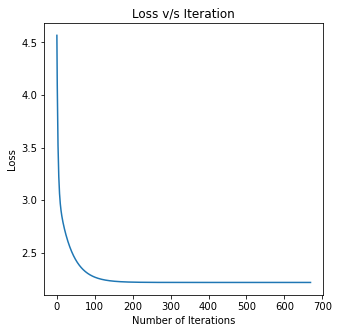

In [16]:
plt.figure(figsize=(5,5));
plt.title('Loss v/s Iteration')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.plot(loss);

The optimal values of a and b are 0.3 and 2.02, when learning rate = 0.01

###### Below is a plot of the solution obtained:

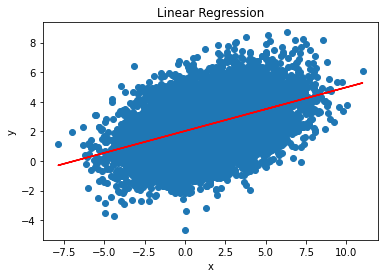

In [17]:
plt.scatter(X, y)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, a*X + b,'r')
plt.show()

### Minibatch stochastic gradient descent:
In Minibatch gradient descent a batch of a fixed number of training examples, say k which is less than the size of the actual dataset is used to update the parameters, in this case parameters are a and b. The batch is created by randomly sampling the data.<br>
When batch size = size of the dataset, minibatch stochastic gradient descent becomes batch gradient descent.<br>
When batch size = 1, minibatch stochastic gradient descent is same as stochastic gradient descent.

In [18]:
def mini_batch_gd(X,y,iterations=1000,batch_size=32,learning_rate=0.01,tol=1e-06) :
    loss=[]
    a=1
    b=1
    n=len(X)
    for i in range(iterations) :
        random_indices= np.random.permutation(10000)
        X_tmp=X[random_indices] #shuffling the data randomly
        Y_tmp=y[random_indices]  
        k=0
        if batch_size < n :
            k=np.random.randint(0,n-batch_size)
        X_batch=X_tmp[k:k+batch_size]   #Taking a random batch of size batch_size
        Y_batch=Y_tmp[k:k+batch_size]
        D_a, D_b = gradient(X_batch,Y_batch,a,b)  #Returns the gradient
        delta1=-learning_rate*D_a
        delta2=-learning_rate*D_b
        if np.all(np.abs(delta1) <= tol) and np.all(np.abs(delta2)<=tol) :
            print('Breaks at '+str(i)+'th iteration')
            break
        a = a + delta1  # Update a
        b = b + delta2  # Update b
        loss.append(cal_loss(X,y,a,b))
    return round(a,2),round(b,2),loss
        
        

**Performing Mini Batch gradient descent at learning rate 0.01 and batch size=64**

In [20]:
a,b,loss_list=mini_batch_gd(X,y,1000,64,0.01) #Performed for 1000 iterations
print(a,b)

0.31 2.01


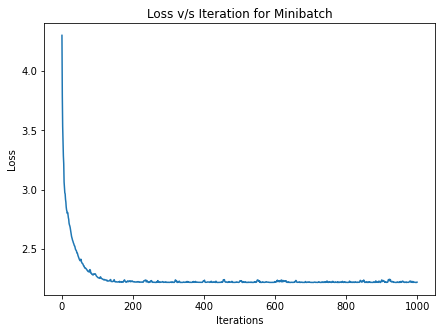

In [21]:
plt.figure(figsize=(7,5))
plt.title('Loss v/s Iteration for Minibatch')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(loss_list)
plt.show()

###### Below is a plot of the solution obtained using mini batch gradient descent:

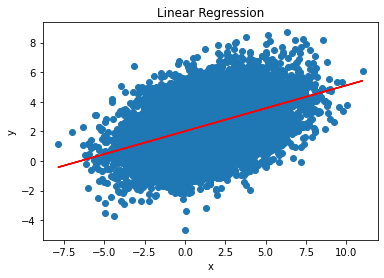

In [22]:
#Plotting the solution obtained
plt.scatter(X, y)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, a*X + b,'r')
plt.show()

### Comparison between Batch Gradient Descent, Mini Batch Gradient Descent and Stochastic Gradient Descent:

In [23]:
#Batch gradient descent
t1=time.time()
a_batch,b_batch,loss_list_batch=mini_batch_gd(X,y,10000,len(X),0.01)
print(a_batch,b_batch)
t2=time.time()
print('Time taken by gradient descent',t2-t1)

Breaks at 670th iteration
0.3 2.02
Time taken by gradient descent 0.7775099277496338


In [24]:
#Mini Batch gradient descent with batch size 64
t1=time.time()
a_mini_batch,b_mini_batch,loss_list_mini_batch= mini_batch_gd(X,y,10000,64,0.01)
t2=time.time()
print('Time taken by mini batch gradient descent',t2-t1)

Time taken by mini batch gradient descent 1.791419506072998


In [25]:
#Stochastic Gradient Descent
t1=time.time()
a_sgd,b_sgd,loss_list_sgd=mini_batch_gd(X,y,10000,1,0.01)
t2=time.time()
print('Time taken by stochastic batch gradient descent',t2-t1)

Time taken by stochastic batch gradient descent 1.732555627822876


In all the above cases, Learning rate is 0.01. <br>
But taking the same learning rate for all three types of Gradient descent is not very practical, as it doesnot always converge for the same learning rate.

Also, Batch gradient descent directly converges to the global optima, where as SGD might converge to some local optima depending upon the learning rate. The updates made on parameters are noisy for SGD (logically, should work better with a smaller learning rate). So, it is important to find an optimal learning rate for SGD for which the convergence is faster and the loss is minimum.

###### Finding the best learning rate for stochastic gradient descent :

In [26]:
learning_rates=[0.01,0.009,0.005,0.001,0.0005,0.0001]
loss_sgd=[]
time_sgd=[]
for lr in learning_rates :
    t1=time.time()
    a,b,loss=mini_batch_gd(X,y,5000,1,lr)
    print(a,b)
    t2=time.time()
    loss_sgd.append(loss[-1])
    time_sgd.append(t2-t1)    

0.18 1.95
0.14 2.07
0.29 2.23
Breaks at 3137th iteration
0.29 2.05
0.32 1.98
Breaks at 57th iteration
0.95 1.0


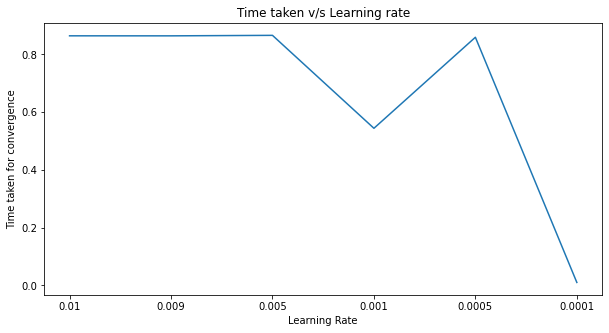

In [27]:
plt.figure(figsize=(10,5))
plt.title('Time taken v/s Learning rate')
plt.xlabel("Learning Rate")
plt.ylabel("Time taken for convergence")
plt.xticks(np.arange(len(learning_rates)),labels=learning_rates)
plt.plot(time_sgd)
plt.show()

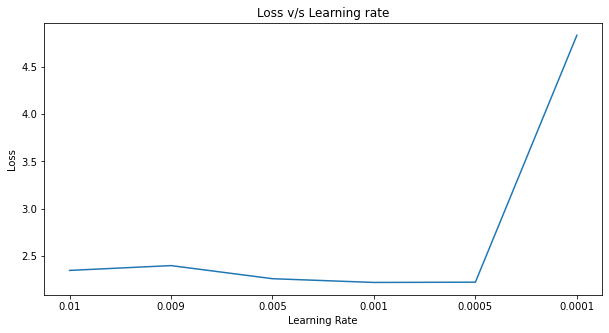

In [28]:
plt.figure(figsize=(10,5))
plt.title('Loss v/s Learning rate')
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.xticks(np.arange(len(learning_rates)),labels=learning_rates)
plt.plot(loss_sgd)
plt.show()

From the above two graphs it can be said that, learning rate = 0.001 works the best for stochastic gradient descent, considering both loss time taken to converge.

###### Performing SGD for learning rate = 0.001:

In [29]:
t1=time.time()
a,b,loss_sgd=mini_batch_gd(X,y,10000,1,0.001)
print(a,b)
t2=time.time()
print('Time taken to converge '+str(t2-t1))

Breaks at 6509th iteration
0.35 2.06
Time taken to converge 1.129509449005127


###### Performing Batch gradient descent for learning rate = 0.001:

In [30]:
t1=time.time()
a,b,loss_gd=mini_batch_gd(X,y,10000,len(X),0.001)
print(a,b)
t2=time.time()
print('Time taken to converge '+str(t2-t1))

Breaks at 5138th iteration
0.3 2.02
Time taken to converge 5.950348854064941


###### Performing Mini Batch gradient descent for learning rate 0.001 and batch size 128 :

In [31]:
t1=time.time()
a,b,loss_mgd=mini_batch_gd(X,y,10000,64,0.001)
print(a,b)
t2=time.time()
print('Time taken'+str(t2-t1))

0.29 2.03
Time taken to converge 1.7968075275421143


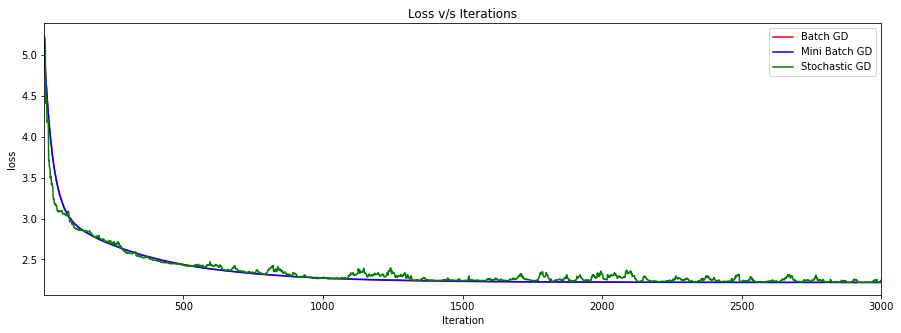

In [32]:
plt.figure(figsize=(15,5))
plt.title('Loss v/s Iterations')
plt.xlabel("Iteration")
plt.ylabel("loss")
plt.xlim([1,3000])
plt.plot(loss_gd,color='r',label='Batch GD')
plt.plot(loss_mgd,color='b',label='Mini Batch GD')
plt.plot(loss_sgd,color='g',label='Stochastic GD')
plt.legend()
plt.show()

###### Conclusion:
At learning rate = 0.001, SGD converges the fastest, followed by Mini batch gradient descent(doesn't really converge in 10K iterations) and batch gradient descent is the slowest. Not everything comes for free though, with the decrease in time for SGD the loss increases when compared to Batch Gradient Descent. Batch gradient descent gives more accurate answers. <br>

To sum it up, there is a trade-off between the time required and accuracy. SGD with a suitable learning rate can give faster solutions with high variance, whereas Batch gradient Descent gives smoother solutions with a bit of extra time. <br>

**On the given dataset**, as it is not very huge, Batch gradient descent can find accurate answers with little extra time. SGD can find good solutions at a suitable learning rate in lesser time, but again it depends on us and the constraints we have. If there are time constraints and loss doesn't matter that much SGD is definitely a good option. 


### Finding the optimal batch size :
Learning rate = 0.001

In [33]:
i=1
loss=[]
time_req=[]
batch_size=[]
while i < 2**15 :
    print('Batch size: ',i)
    t1=time.time()
    a,b,loss_batch= mini_batch_gd(X,y,5000,i,0.001)
    t2=time.time()
    time_req.append(t2-t1)
    loss.append(loss_batch[-1])
    if i >= len(X) :
        batch_size.append(len(X))
    else :
        batch_size.append(i)
    i=i*2


Batch size:  1
Breaks at 4874th iteration
Batch size:  2
Batch size:  4
Batch size:  8
Batch size:  16
Batch size:  32
Batch size:  64
Batch size:  128
Batch size:  256
Batch size:  512
Batch size:  1024
Batch size:  2048
Batch size:  4096
Batch size:  8192
Batch size:  16384


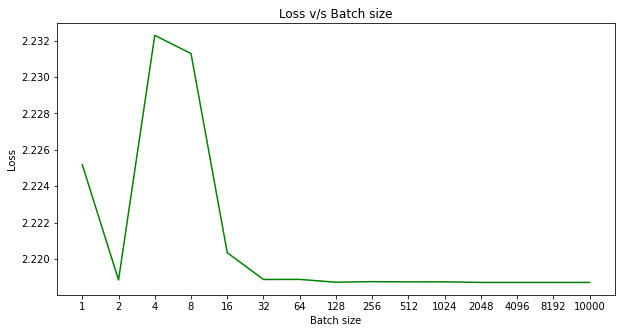

In [34]:
plt.figure(figsize=(10,5))
plt.title('Loss v/s Batch size')
plt.xlabel("Batch size")
plt.ylabel("Loss")
plt.xticks(np.arange(len(batch_size)),labels=batch_size)
plt.plot(loss,color='g')
plt.show()

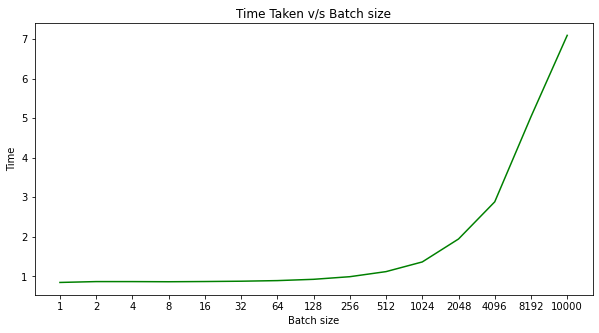

In [35]:
plt.figure(figsize=(10,5))
plt.title('Time Taken v/s Batch size')
plt.xlabel("Batch size")
plt.ylabel("Time")
plt.xticks(np.arange(len(batch_size)),labels=batch_size)
plt.plot(time_req,color='g')
plt.show()

##### Conclusion:
At a particular learning rate different batch sizes take different amount of time to converge. For, best results, both learning rate and batch size should be varied.
However, considering both the loss curve and the time curve, batch sizes in the range of 32 to 128 works the best at learning rate 0.001 for 5000 iterations <br><br>

###### Performing Mini batch Gradient descent for batch size = 64 at learning rate 0.001

In [36]:
a,b,loss=mini_batch_gd(X,y,5000,64,0.001)
print(a,b)

0.3 2.02


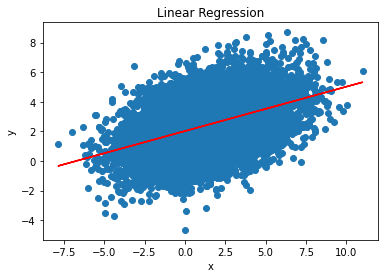

In [37]:
#Plotting the solution obtained
plt.scatter(X, y)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X, a*X + b,'r')
plt.show()

### <center> Answer 2 <center>

###### i) Probability that someone has both cold and fever:

$ P(cold) = \ 0.02 $ <br> <br>
$ P(\overline {cold}) = \ 0.98 $ <br> <br>
$ P({fever}|{cold}) = \ 0.307 $ <br> <br>
$ P({cold}\cap{fever}) = P({fever}|{cold}) * P(cold) $ <br> <br>
$ \implies P({cold}\cap{fever}) = 0.02 * 0.307 $ <br> <br>
$ \implies P({cold}\cap{fever}) = 0.00614 \ (Answer) $ <br><br> 
*The proabability that someone has both cold and fever is 0.00614*

###### ii) Probability that someone who has a cough has a cold.

$ P(cold) = \ 0.02 $ <br> <br>
$ P(\overline {cold}) = \ 0.98 $ <br><br>
$ P(smokes) = \ 0.2 $ <br> <br>
$ P(\overline {smokes}) = 0.8 $ <br> <br>
$ P({lung \ disease}|{smokes}) = 0.1009 $ <br> <br>
$ P({lung \ disease}|{\overline {smokes}}) = 0.001 $ <br> <br>
$ \therefore P(lung \ disease) = P( {lung \ disease}|{smokes})* P(smokes) + P({lung \ disease}|{\overline {smokes}})*P(\overline {smokes}) $ <br> <br>
$ \implies P(lung \ disease) = \ 0.1009*0.2 + \ 0.001*0.8 $ <br> <br>
$ \implies P(lung \ disease) = \ 0.02098 $ <br> <br>
$ \therefore P(\overline {lung \ disease}) = 1 - P(lung \ disease) $ <br> <br>
$ \implies P(\overline {lung \ disease}) = 1 - \ 0.02098 $ <br> <br>
$ \implies P(\overline {lung \ disease}) = \ 0.97902 $ <br> <br>

Also, cold and lung disease are independent events. <br> <br>
$ P(cough) = \ P({cough}|{cold,lung \ disease}) *P(cold)*P(lung \ disease) + P({cough}|{\overline {cold},lung \ disease})*P(\overline {cold})*P(lung \ disease)$ <br>$ \ + P({cough}|{cold,\overline {lung \ disease}})*P(cold)*P(\overline {lung \ disease}) + P({cough}|{\overline {cold},\overline {lung \ disease}})*P(\overline {cold})*P(\overline {lung \ disease}) $ <br><br><br>
$ \implies P(cough) = 0.7525*0.02*0.02098 + 0.505*0.98*0.02098 + 0.505 * 0.02*0.97902 + 0.01 * 0.98*0.97902 $ <br> <br>
$\implies P(cough) = 0.03 $

From Baye's Theorem we know, <br><br>
$ P({cold}|{cough}) = \frac {P(cold \cap cough)}{P(cough)} $ <br> <br>
$ \implies P({cold}|{cough}) = \frac{ 0.7525∗0.02∗0.02098+0.505∗0.02∗0.97902}{0.03} $ (Rounding off to 4 decimal places) <br> <br>
$ \implies P({cold}|{cough}) = \frac{0.0101}{0.03} $ <br> <br>
$ \implies P({cold}|{cough}) = 0.3367 \ (Answer) $ 

*The probability that someone who has a cough has a cold = 0.3367* 

### <center> Answer 3 
**MLE for the parameters of a k-sided multinomial distribution**

Let $ X_{1}, X_{2},...,X_{k}$ be k boxes, and let $ x_{1},x_{2},...x_{k} $ be the number of balls that fall into each of the boxes. Let, the total number of balls be n and the probabilty of a ball falling into the $ i^{th} $ box be $p_{i}$ .<br> <br>
<center>$ \therefore \sum_{i=1}^{k} x_{i} = n $ and  $\sum_{i=1}^{k} p_{i} = 1$ 

Therefore, the joint probability of $ x_{1},x_{2},....,x_{n} $ has the form : <br><br>
$ f(x_{1},x_{2},......,x_{k} | p_{1},p_{2},....,p_{k}) = \frac {n!}{x_{1}! x_{2}! .....x_{k}!}p_{1}^{{x}_{1}} p_{2}^{{x}_{2}}p_{3}^{{x}_{3}}.....p_{k}^{{x}_{k}}$ <br><br>

Therefore, log likelihood of f will be:<br>
$ l(p_{1},p_{2},p_{3},.....,p_{k}) = log(f) = logn! - \sum_{i=1}^{k}logx_{i}! + \sum_{i=1}^{k}x_{i}logp_{i} $

As, the above is a constrained optimization problem, it cannot be maximized directly.  Lagrange multiplier is used to take $ \sum_{i=1}^{k} p_{i} = 1$ into consideration.

$ L(p_{1},p_{2},...,p_{k},\lambda) \ =  \ l(p_{1},p_{2},...,p_{k}) \ + \ \lambda(1 - \sum_{i=1}^{k}p_{i} )$ , where $\lambda$ is the lagrange multiplier.

For maximizing the above equation, we take partial derivatives of L with respect to $\lambda$ and $p_{i}$ <br><br>
$ \frac {\delta L(p_{i},\lambda)}{\delta p_{i}} = 0 $ <br> <br>
$\implies \frac{x_{i}}{p_{i}} - \lambda = 0$ ----- equation 1

$ \frac {\delta L(p_{i},\lambda)}{\delta \lambda} = 0 $ <br> <br>
$ \implies 1 - \sum_{i=1}^{k}p_{i} = 0 $ <br><br>
$ \implies \sum_{i=1}^{k}p_{i} = 1 $ ----- equation 2

<br><br>
Taking summation in LHS and RHS of equation 1 for i = 1 to k we get :<br><br>
$ \frac{\sum_{i=1}^{k} x_{i}}{\sum_{i=1}^{k} p_{i}} = \lambda $ <br><br>
Substituting $ \sum_{i=1}^{k} x_{i} = n $ in the above equation we get : <br><br>
$ \implies \lambda = n $

Substituting $\lambda$ in equation 1 we get :
$\hat p_{i} = \frac {x_{i}}{n}$

Therefore, the probability distribution that maximizes the likelihood is <br>
<center> p = ($ \frac{x_{1}}{n},\frac{x_{2}}{n},..\frac{x_{k}}{n}$)